In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fwidataset/FWI Dataset.xlsx


Module 1
Collected a structured dataset containing relevant environmental features and FWI target variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported Successfulley")

Imported Successfulley


In [3]:
import pandas as pd
df = pd.read_excel("/kaggle/input/fwidataset/FWI Dataset.xlsx")   
print("Dataset loaded succesfully")


Dataset loaded succesfully


In [4]:
print("\nBasic Information About Dataset:")
print(df.info())


Basic Information About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [6]:
print("\nFirst 4 Rows of Dataset")
display(df.head())
print("\nLast 4 Rows of Dataset")
display(df.tail())




First 4 Rows of Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia



Last 4 Rows of Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [8]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


Module 2
****Checked for missing or null values and handled them appropriately.

In [9]:
print("Before:\n", df.isnull().sum())
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nAfter:\n", df.isnull().sum())


Before:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

After:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [10]:
def iqr_outlier_flags(series):
    q1 = series.quantile(0.25); q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
    return ~series.between(low, high)
outlier_cols = []
for c in num_cols:
    mask = iqr_outlier_flags(df[c])
    n = mask.sum()
    if n>0:
        outlier_cols.append((c, int(n)))
print("Outliers flagged per column:", outlier_cols)


Outliers flagged per column: [('Temperature', 2), ('Ws', 8), ('Rain', 35), ('FFMC', 16), ('DMC', 12), ('ISI', 4), ('BUI', 12)]


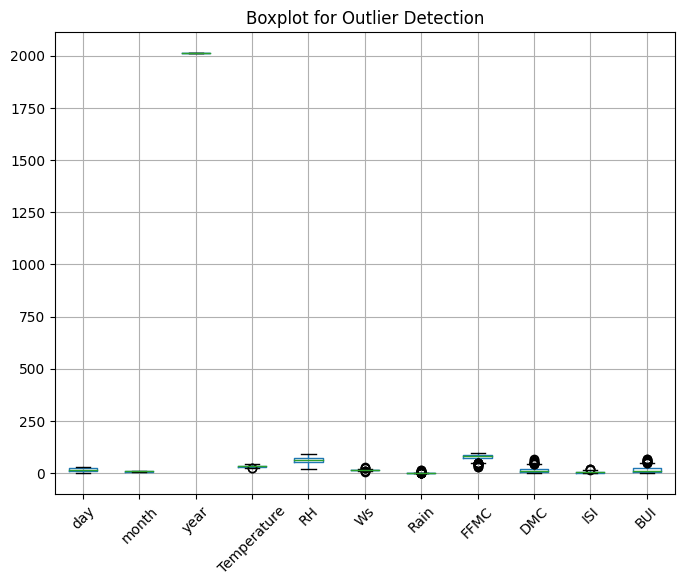


Outliers in day:
Series([], Name: day, dtype: int64)

Outliers in month:
Series([], Name: month, dtype: int64)

Outliers in year:
Series([], Name: year, dtype: int64)

Outliers in Temperature:
93     22
105    22
Name: Temperature, dtype: int64

Outliers in RH:
Series([], Name: RH, dtype: int64)

Outliers in Ws:
2      22
52     22
105    26
176     9
199     9
232     8
237     6
241    29
Name: Ws, dtype: int64

Outliers in Rain:
1       1.3
2      13.1
3       2.5
14      3.1
38      1.4
91     16.8
92      7.2
93     10.1
94      3.8
101     1.8
102     1.8
104     4.6
105     8.3
116     5.8
120     1.8
121     1.4
123     4.0
124     2.0
129     1.3
134     2.0
138     4.7
139     8.7
140     4.5
151     1.7
152     2.2
159     6.0
160     1.9
161     3.8
162     2.9
188     3.1
189     2.9
218     4.1
219     6.5
237     2.0
240     4.4
Name: Rain, dtype: float64

Outliers in FFMC:
2      47.1
3      28.6
15     36.1
16     37.3
92     46.0
93     30.5
94     42.6
104    40.9
1

In [11]:

plt.figure(figsize=(8, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()
def detect_outliers_iqr(dataframe):
    outlier_indices = {}

    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
        outlier_indices[column] = outliers
        print(f"\nOutliers in {column}:")
        print(outliers)
    return outlier_indices

outlier_results = detect_outliers_iqr(df)

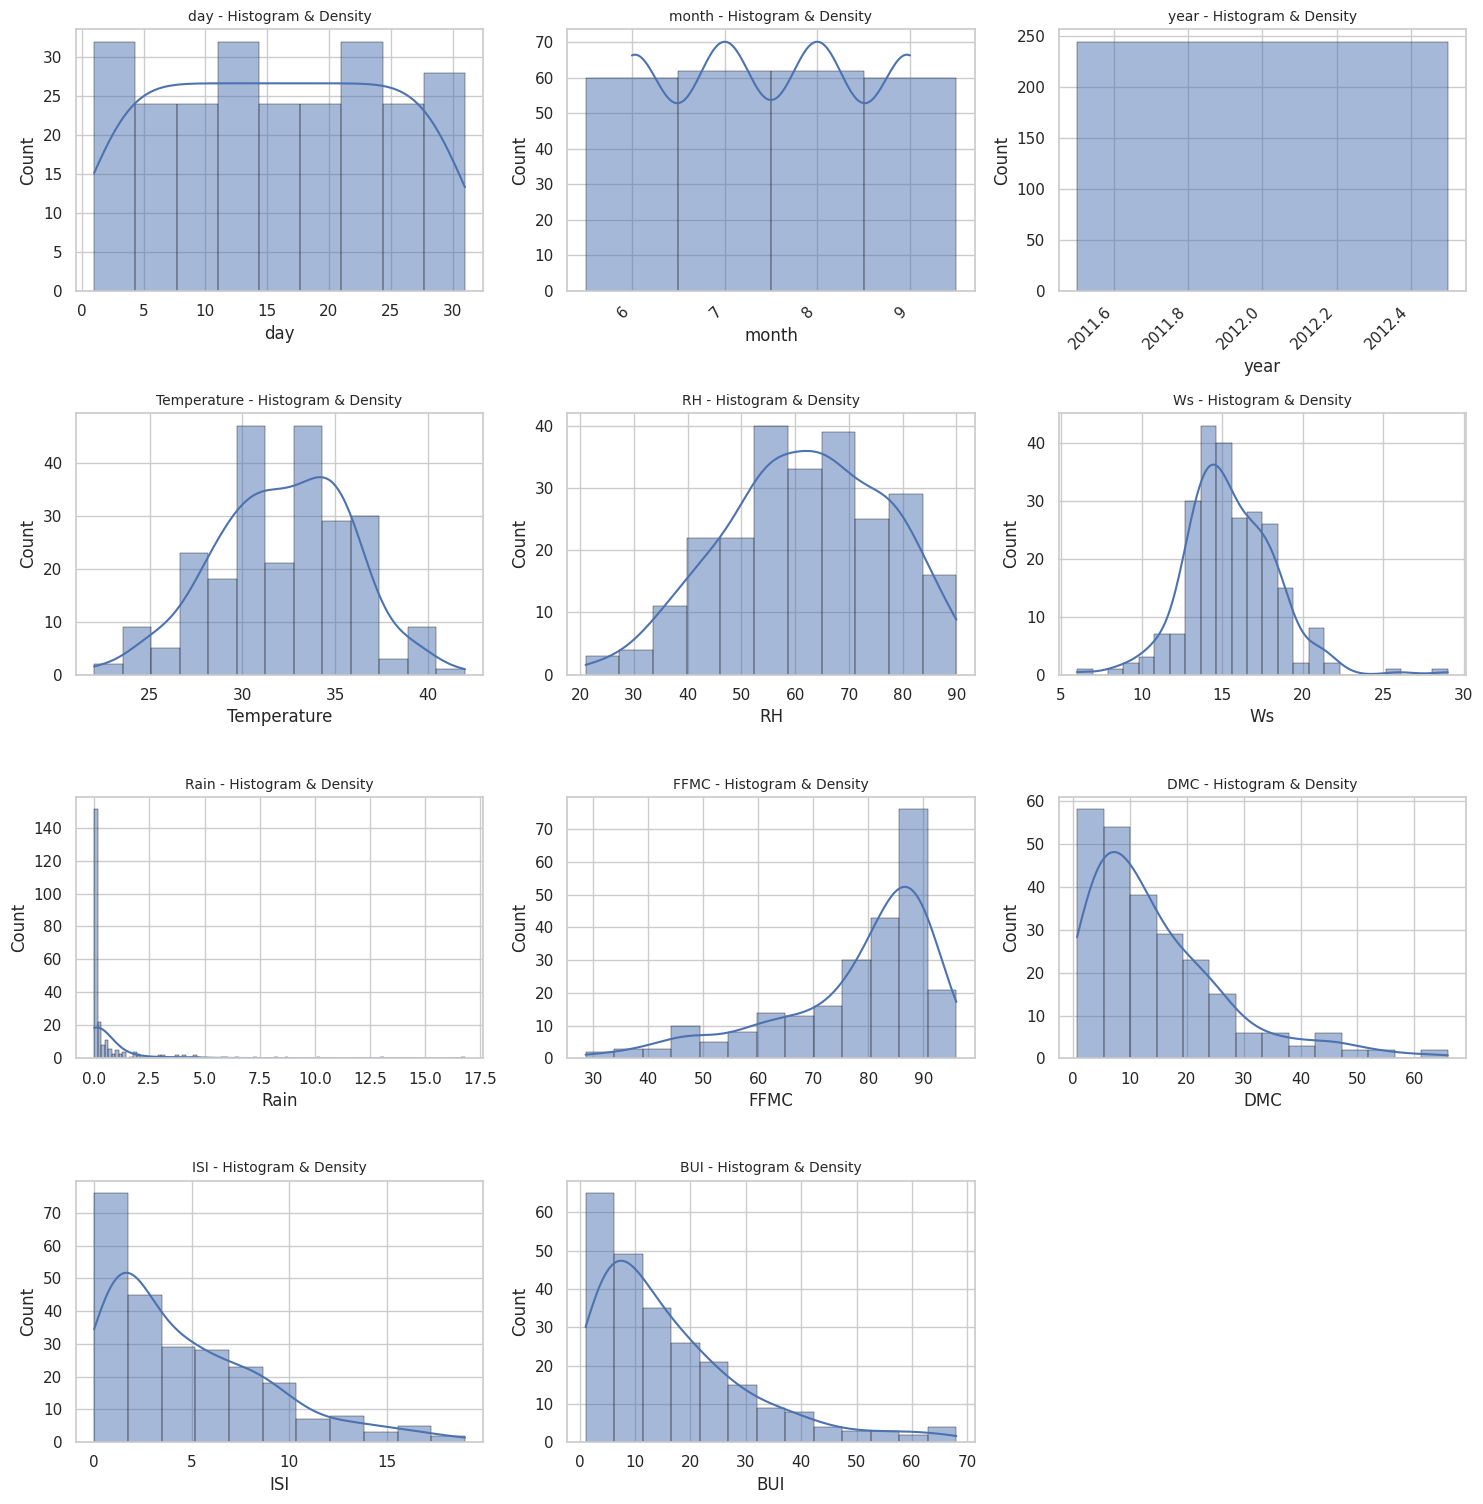

In [12]:

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' not in globals():
    raise NameError("DataFrame 'df' not found. Load your dataset first (e.g. df = pd.read_excel(...)).")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df = df.replace([np.inf, -np.inf], np.nan).copy()
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if df[c].notna().sum() > 0]
sns.set_theme(style="whitegrid")
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 3.8*rows), squeeze=False)

color = "#4C72B0"     # pleasant blue
for ax, col in zip(axes.flat, num_cols):
    data = df[col].dropna()
    if data.nunique() <= 10:  # categorical-like -> use count histogram
        sns.histplot(data, kde=True, stat='count', discrete=True, ax=ax, color=color, edgecolor='k', linewidth=0.3)
    else:
        sns.histplot(data, kde=True, ax=ax, color=color, edgecolor='k', linewidth=0.3)
    ax.set_title(f"{col} - Histogram & Density", fontsize=10)
    ax.set_ylabel("Count")
    if data.nunique() <= 10:
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
for ax in axes.flat[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


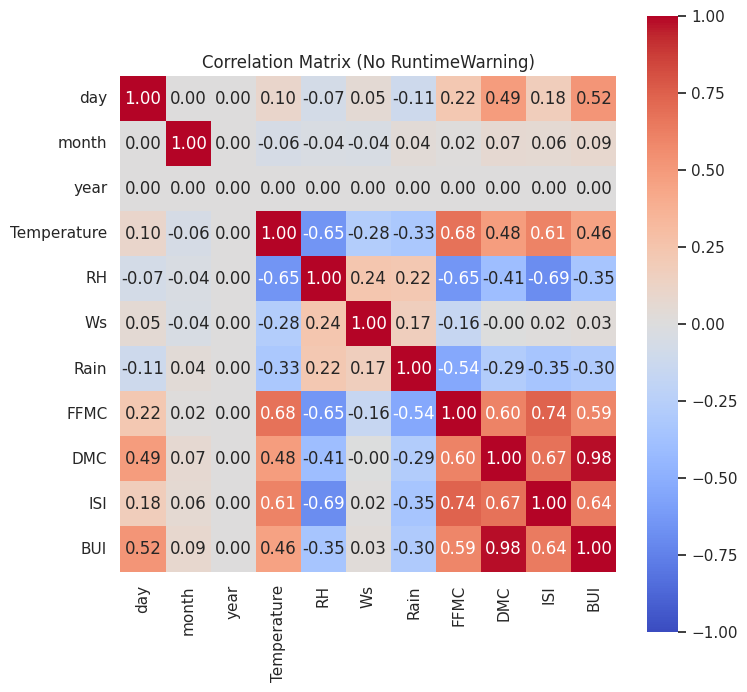

In [13]:
corr_matrix = df.corr(numeric_only=True)

# Replace NaN with 0 (or any neutral value)
corr_matrix = corr_matrix.fillna(0)

plt.figure(figsize=(8,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    square=True,
    fmt='.2f',
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix (No RuntimeWarning)")
plt.show()


Extended pairplot features: ['ISI', 'DMC', 'BUI', 'FFMC', 'RH', 'Temperature', 'day', 'Rain']


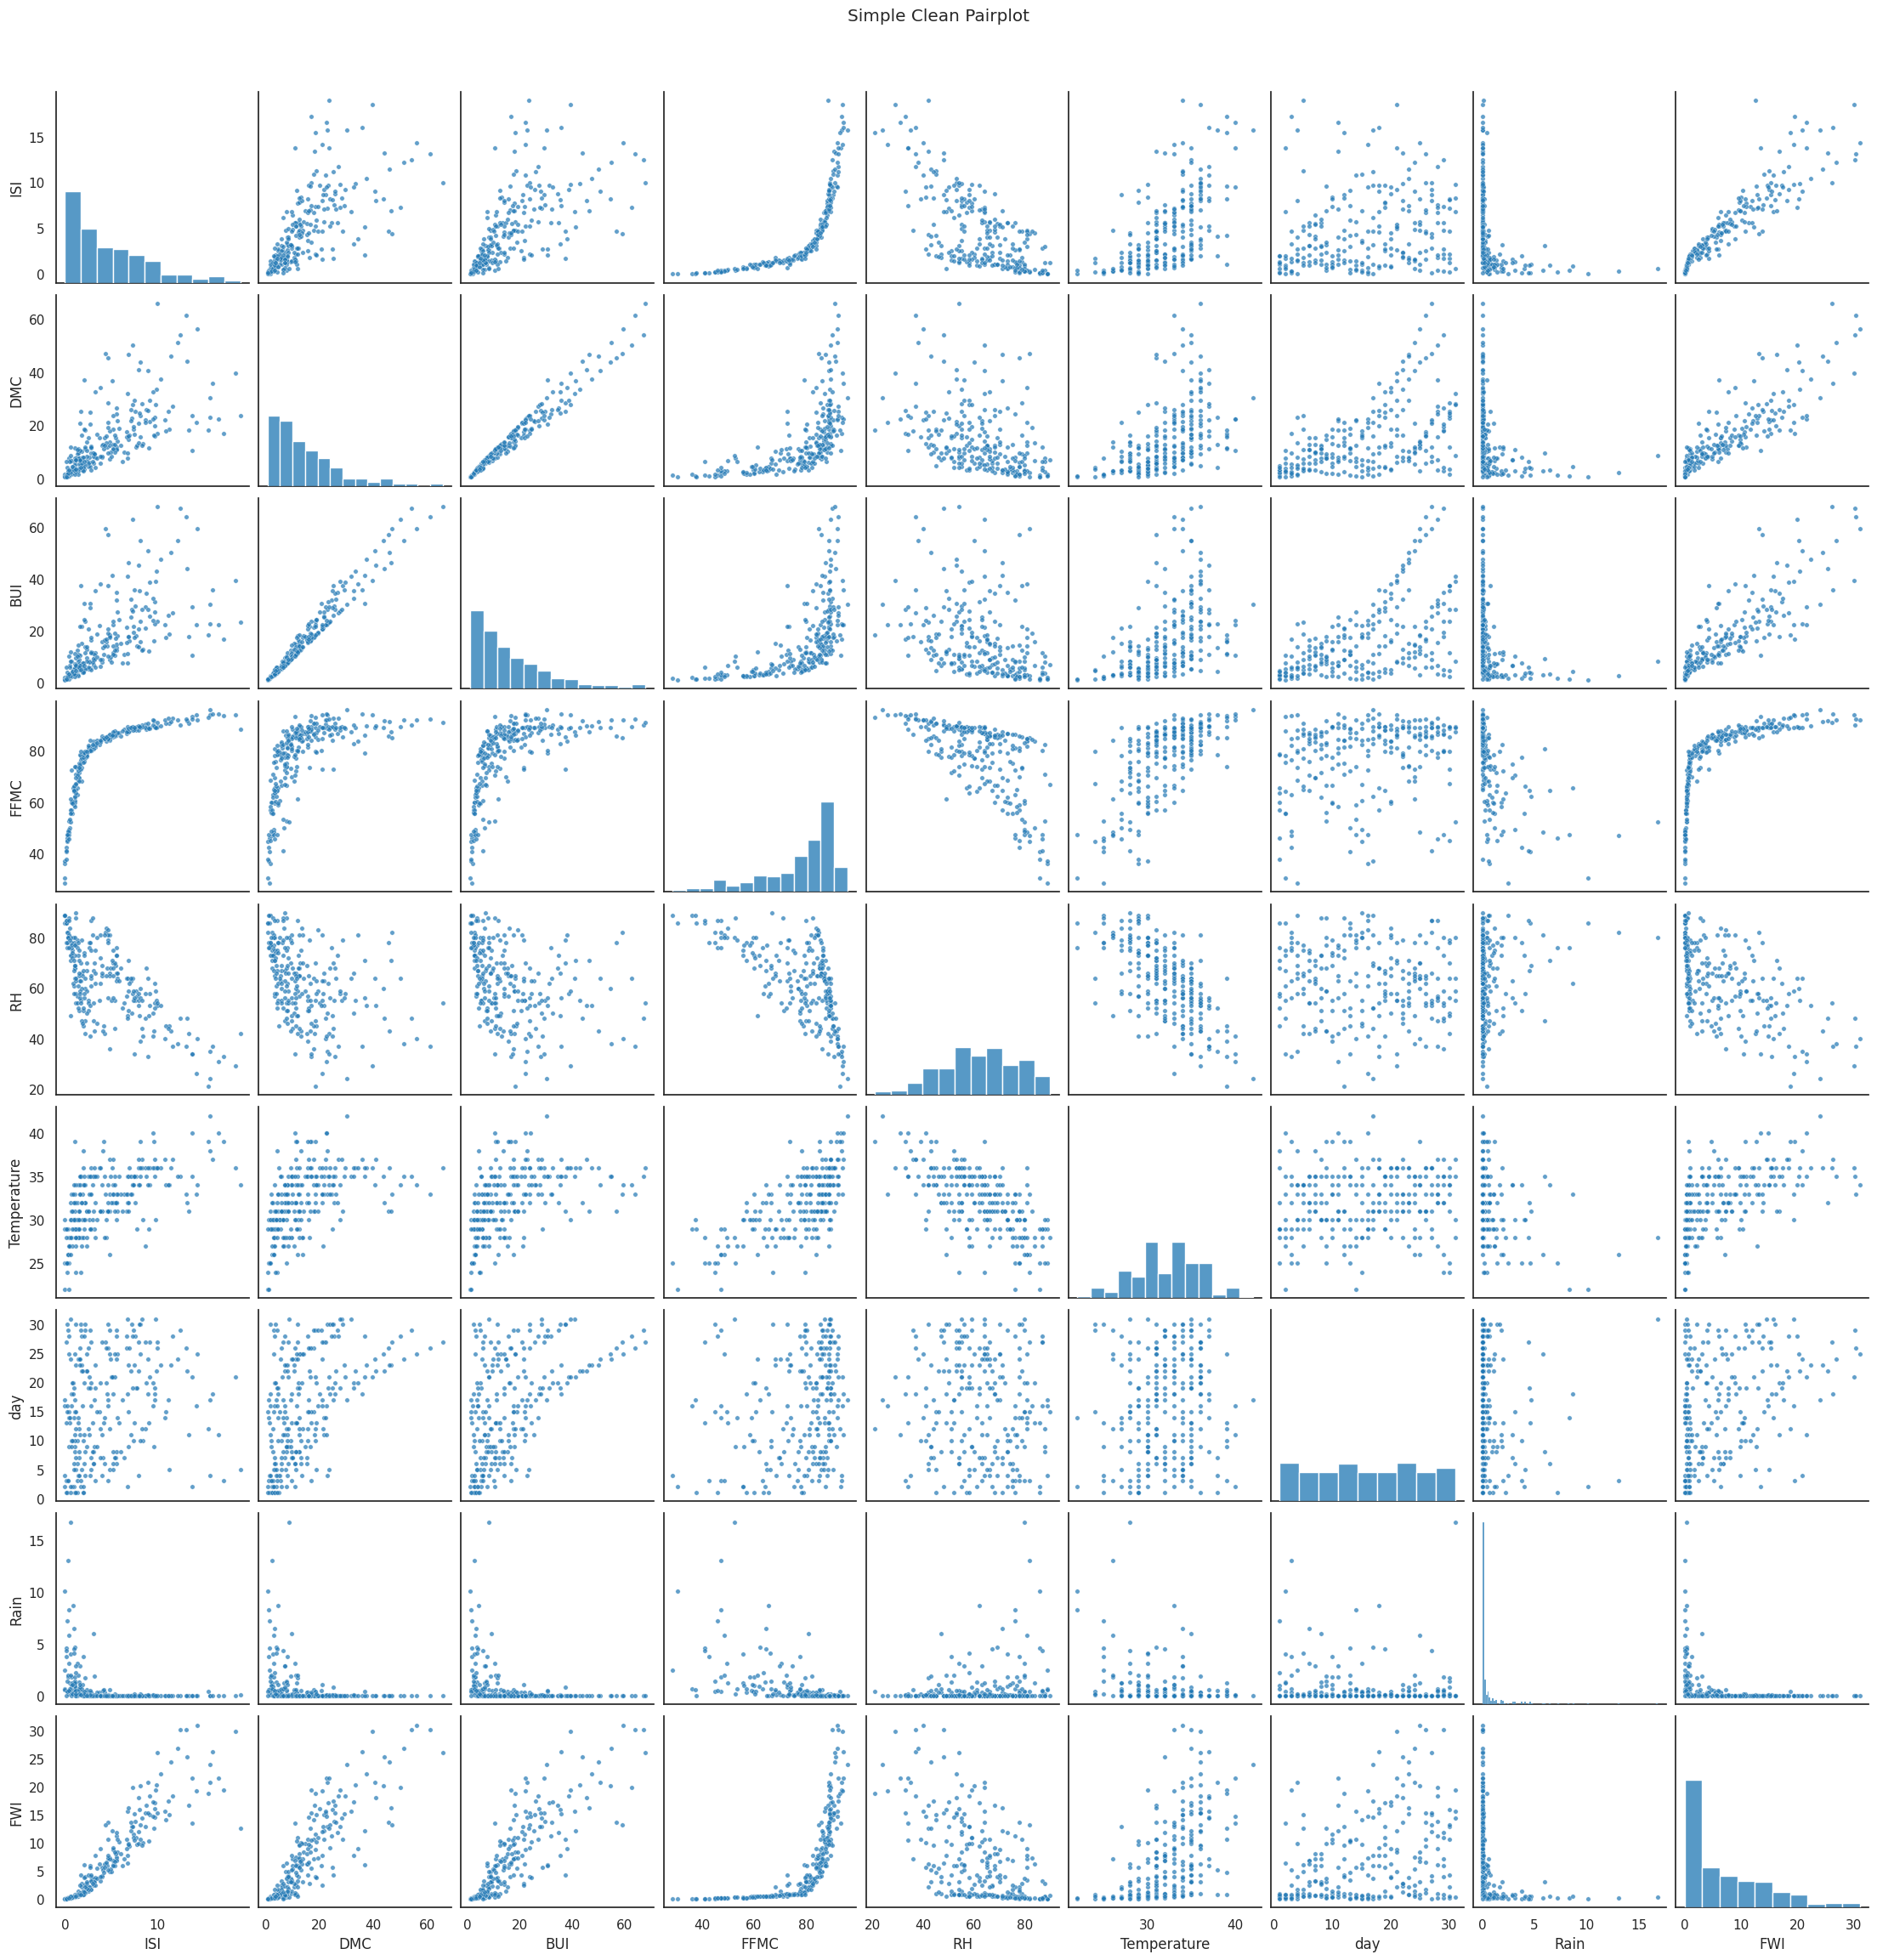

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = df.copy()
df.columns = df.columns.str.strip()          
df = df.replace([np.inf, -np.inf], np.nan)
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
corr = df.corr(numeric_only=True)

if 'FWI' not in corr.columns:
    raise ValueError("FWI column not found in numeric correlation matrix")

top_n = 8
top_feats_extended = (
    corr['FWI']
    .abs()
    .sort_values(ascending=False)
    .drop('FWI')
    .head(top_n)
    .index
    .tolist()
)

print("Extended pairplot features:", top_feats_extended)

pairplot_df = df[top_feats_extended + ['FWI']].dropna()

if len(pairplot_df) > 3000:
    pairplot_df = pairplot_df.sample(3000, random_state=42)

sns.set_theme(style="white")

g = sns.pairplot(
    pairplot_df,
    vars=top_feats_extended + ['FWI'],
    diag_kind="hist",
    corner=False,
    plot_kws={"s": 15, "alpha": 0.7, "color": "#1f77b4"},
    diag_kws={"color": "#1f77b4"}
)

g.fig.suptitle("Simple Clean Pairplot", y=1.03)
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder  
df.columns = df.columns.str.strip()
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])
print("Encoded Values:\n")
print(df[['Region', 'Region_encoded']].head())
print("\nRegion Mapping:")
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)


Encoded Values:

   Region  Region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0

Region Mapping:
{'Bejaia': 0, 'Sidi-Bel Abbes': 1}
Region              object
Region_encoded    category
dtype: object


In [16]:

df.to_csv("/kaggle/working/cleaned_fwi.csv", index=False)
print(" Cleaned dataset saved successfully!")
print(" File location: /kaggle/working/cleaned_fwi.csv")
df_check = pd.read_csv("/kaggle/working/cleaned_fwi.csv")
print("\n Preview of saved file:")
display(df_check.head())


 Cleaned dataset saved successfully!
 File location: /kaggle/working/cleaned_fwi.csv

 Preview of saved file:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Region_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,0


Milestone 2

In [112]:
df = pd.read_csv("/kaggle/working/cleaned_fwi.csv")
print("Dataset loaded successfully!")

df = df.dropna(subset=['FWI'])
df = df.dropna()


Dataset loaded successfully!


In [143]:
import pandas as pd
import numpy as np
df_numeric = df.select_dtypes(include='number')
df_numeric = df_numeric.loc[:, df_numeric.std() != 0]
corr = (
    df_numeric
    .corr()['FWI']
    .abs()
    .dropna()
    .sort_values(ascending=False)
)
threshold = 0.30
final_features = corr[corr >= threshold].index.tolist()
if 'FWI' in final_features:
    final_features.remove('FWI')
for col in ['day', 'month', 'year']:
    if col in final_features:
        final_features.remove(col)
for col in ['DC', 'Ws']:
    if col in df.columns and col not in final_features:
        final_features.append(col)
X = df[final_features]
y = df['FWI']
print("Final Features :")
print(final_features)


Final Features :
['ISI', 'DMC', 'BUI', 'FFMC', 'RH', 'Temperature', 'Rain', 'DC', 'Ws']


In [144]:
final_features = [
    'Temperature',
    'RH',
    'Ws',
    'Rain',
    'FFMC',
    'DMC',
    'DC',
    'ISI',
    'BUI'
]
X = df[final_features]
y = df['FWI']

print("Shape of X - input features:", X.shape)
print("Shape of y - target variable:", y.shape)


Shape of X - input features: (243, 9)
Shape of y - target variable: (243,)


In [145]:
import pandas as pd
import numpy as np
df_numeric = df.select_dtypes(include='number').copy()
df_numeric = df_numeric.loc[:, df_numeric.var() > 0]
corr_with_fwi = (
    df_numeric
    .corr(method='pearson')
    ['FWI']
    .dropna()                 
    .sort_values(ascending=False)
)

print("Correlation of selected features with FWI:")
print(corr_with_fwi)


Correlation of selected features with FWI:
FWI               1.000000
ISI               0.922895
DMC               0.875864
BUI               0.857973
FFMC              0.691132
Temperature       0.566670
day               0.350781
Region_encoded    0.197102
month             0.082639
Ws                0.032368
Rain             -0.324422
RH               -0.580957
Name: FWI, dtype: float64


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (194, 9)
X_test: (49, 9)
y_train: (194,)
y_test: (49,)


In [149]:
import pandas as pd
import numpy as np

# Force all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN (created due to conversion)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled.describe())

        Temperature            RH            Ws          Rain          FFMC           DMC            DC           ISI           BUI
count  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02
mean  -3.021638e-16  1.922860e-16  1.602384e-16  2.632488e-17  8.607090e-16 -6.867359e-17  1.007213e-16 -4.692695e-17 -9.614302e-17
std    1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00
min   -2.796647e+00 -2.722316e+00 -2.896903e+00 -3.801557e-01 -3.514355e+00 -1.095782e+00 -8.894062e-01 -1.143565e+00 -1.060395e+00
25%   -6.012013e-01 -6.540988e-01 -6.154450e-01 -3.801557e-01 -4.968853e-01 -7.204398e-01 -8.216428e-01 -8.138422e-01 -7.529531e-01
50%    2.220908e-01  7.978492e-02 -2.352019e-01 -3.801557e-01  3.835060e-01 -3.067969e-01 -3.633611e-01 -2.990111e-01 -3.391536e-01
75%    7.709523e-01  7.469519e-01  5.252842e-01 -1.520870e-01  7.669022e-01 

In [152]:
import pickle   
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
with open("scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

print(type(loaded_scaler))


<class 'sklearn.preprocessing._data.StandardScaler'>


Module 4: Model Training using Ridge Regression  

In [153]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

with open('linear.pkl', 'wb') as file:
    pickle.dump(linear_model, file)
print("Linear Regression model saved successfully.")

Linear Regression model saved successfully.


In [154]:
ridge = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_gs = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_gs.fit(X_train_scaled, y_train)
ridge_model = ridge_gs.best_estimator_
with open('ridge.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)
print("Ridge Regression model saved successfully.")

Ridge Regression model saved successfully.


In [155]:
ridge = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_gs = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_gs.fit(X_train_scaled, y_train)
ridge_model = ridge_gs.best_estimator_
with open('ridge.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)
print("Ridge Regression model saved successfully.")

Ridge Regression model saved successfully.


In [156]:
lasso = Lasso(max_iter=10000)
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_gs = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

lasso_gs.fit(X_train_scaled, y_train)
lasso_model = lasso_gs.best_estimator_

with open('lasso.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)
print("Lasso Regression model saved successfully.")

Lasso Regression model saved successfully.


In [157]:
elastic = ElasticNet(max_iter=10000)
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

elastic_gs = GridSearchCV(
    elastic,
    elastic_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

elastic_gs.fit(X_train_scaled, y_train)
elastic_model = elastic_gs.best_estimator_

with open('elasticnet.pkl', 'wb') as file:
    pickle.dump(elastic_model, file)
print("ElasticNet model saved successfully.")

ElasticNet model saved successfully.


In [158]:
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_gs = GridSearchCV(
    dt,
    dt_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

dt_gs.fit(X_train_scaled, y_train)
dt_model = dt_gs.best_estimator_

with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
print("Decision Tree model saved successfully.")

Decision Tree model saved successfully.


In [199]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_model,
    "Decision Tree": dt_model
}
results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "Train R^2": r2_score(y_train, y_pred_train),
        "Test R^2": r2_score(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R^2  Test R^2
0  Linear Regression   0.672620  0.424018    1.277897   0.596185   0.973084  0.988273
1   Ridge Regression   0.679330  0.476902    1.281513   0.751348   0.972931  0.981374
2   Lasso Regression   0.671255  0.433523    1.279094   0.623025   0.973033  0.987193
3        Elastic Net   0.687082  0.487708    1.283489   0.773359   0.972848  0.980267
4      Decision Tree   0.004163  0.809498    0.017866   1.388285   0.999995  0.936409


In [177]:
print("Model Comparison")
print("Ridge Regression       :",ridge_model.score(X_test_scaled, y_test))
print("Linear Regression      :", linear_model.score(X_test_scaled, y_test))
print("Lasso Regression       :", lasso_model.score(X_test_scaled, y_test))
print("ElasticNet Regression  :", elastic_model.score(X_test_scaled, y_test))
print("Decision Tree          :", dt_model.score(X_test_scaled, y_test))

Model Comparison
Ridge Regression       : 0.9813740484635769
Linear Regression      : 0.9882726857720828
Lasso Regression       : 0.9871930116375336
ElasticNet Regression  : 0.9802667584539512
Decision Tree          : 0.9364092927828337


**MILESTONE 3**


**MODULE 5**
* Evaluated the model using Mean Absolute Error(MAE)

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [200]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

mae_results = []

models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_model,
    "Decision Tree": dt_model
}

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    mae_results.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test)
    })

mae_df = pd.DataFrame(mae_results)
print("Mean Absolute Error (MAE):")
print(mae_df.to_string(index=False))


Mean Absolute Error (MAE):
            Model  Train MAE  Test MAE
Linear Regression   0.672620  0.424018
 Ridge Regression   0.679330  0.476902
 Lasso Regression   0.671255  0.433523
      Elastic Net   0.687082  0.487708
    Decision Tree   0.004163  0.809498


• Computed Root Mean Squared Error (RMSE) to penalize large errors.

In [201]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    rmse_results.append({
        "Model": name,
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    })

rmse_df = pd.DataFrame(rmse_results)
print("Root Mean Squared Error (RMSE):")
print(rmse_df.to_string(index=False))


Root Mean Squared Error (RMSE):
            Model  Train RMSE  Test RMSE
Linear Regression    1.277897   0.596185
 Ridge Regression    1.281513   0.751348
 Lasso Regression    1.279094   0.623025
      Elastic Net    1.283489   0.773359
    Decision Tree    0.017866   1.388285


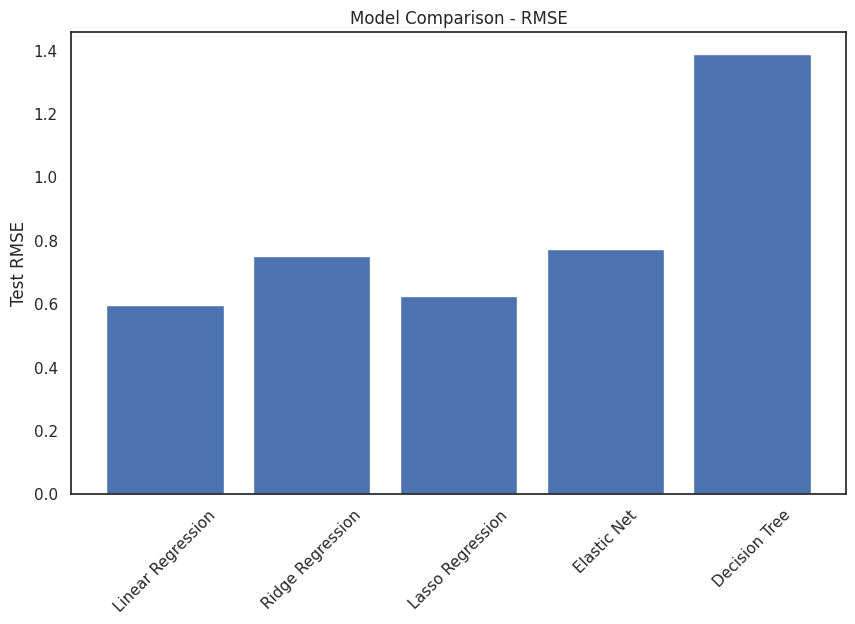

In [202]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["Test RMSE"])
plt.ylabel("Test RMSE")
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=45)
plt.show()

• Calculated R² Score to assess variance explanation. 

In [211]:
from sklearn.metrics import r2_score

r2_results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    r2_results.append({
        "Model": name,
        "Train R²": r2_score(y_train, y_pred_train),
        "Test R²": r2_score(y_test, y_pred_test)
    })

r2_df = pd.DataFrame(r2_results)
print("R² Score:")
print(r2_df.to_string(index=False))


R² Score:
            Model  Train R²  Test R²
Linear Regression  0.973084 0.988273
 Ridge Regression  0.972931 0.981374
 Lasso Regression  0.973033 0.987193
      Elastic Net  0.972848 0.980267
    Decision Tree  0.999995 0.936409


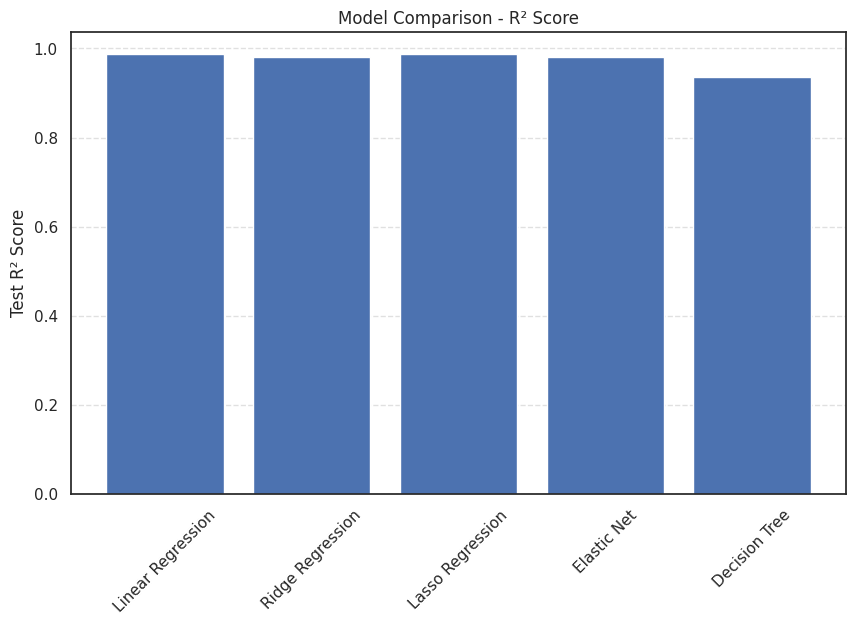

In [209]:
plt.figure(figsize=(10,6))
plt.bar(r2_df["Model"], r2_df["Test R²"])
plt.ylabel("Test R² Score")
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


 Plotted predicted vs actual values to visualize performance

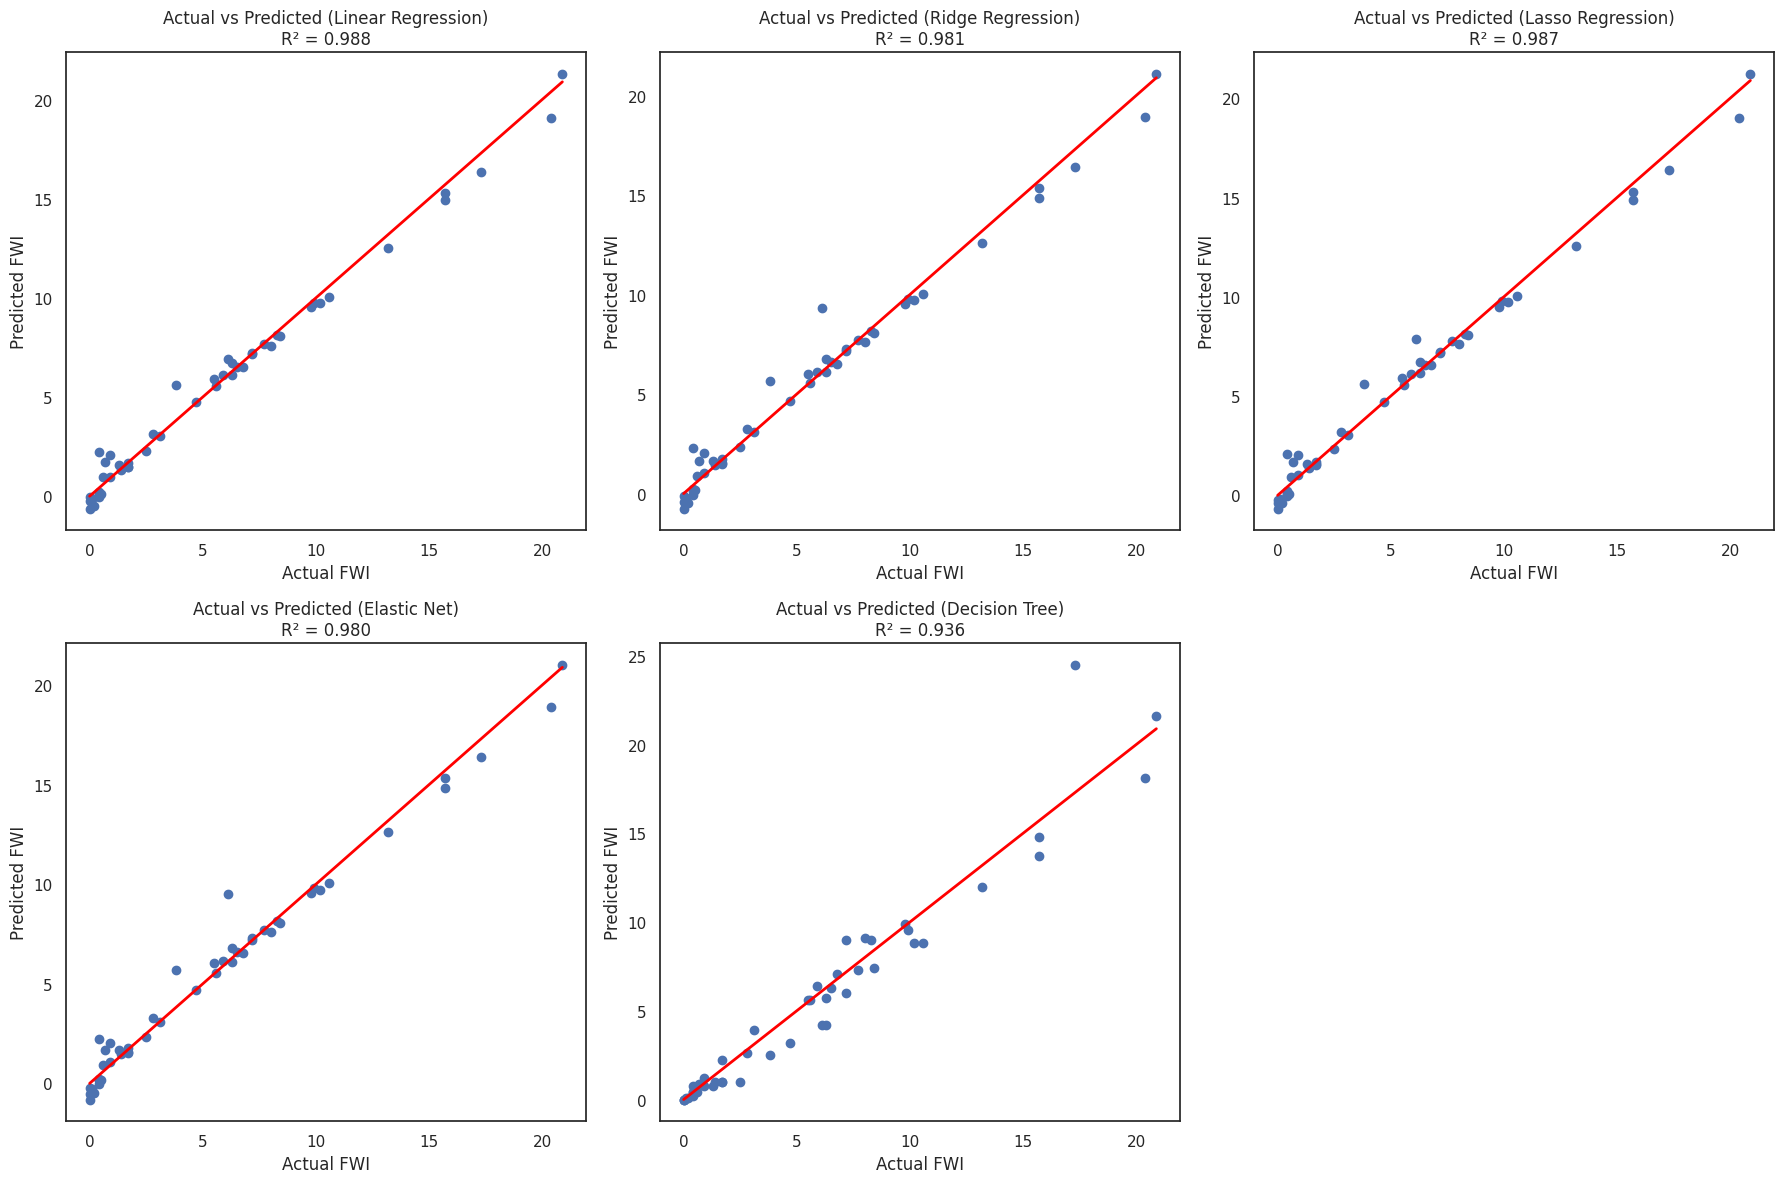

In [213]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_model,
    "Decision Tree": dt_model
}

plt.figure(figsize=(18, 12))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             color='red', linewidth=2)

    plt.title(f"Actual vs Predicted ({name})\nR² = {r2:.3f}")
    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")

plt.tight_layout()
plt.show()

*  Tuned model parameters (alpha) and retrained if needed to improve metrics. (Ridge Regression)

In [218]:

import numpy as np
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1, 5, 9, 55, 100]
}
ridge_gs = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_params,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

ridge_gs.fit(X_train, y_train)
best_ridge = ridge_gs.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Ridge Regression (After Hyperparameter Tuning)")
print("Best Alpha :", ridge_gs.best_params_['ridge__alpha'])
print("MAE        :", ridge_mae)
print("RMSE       :", ridge_rmse)
print("R² Score   :", ridge_r2)
joblib.dump(best_ridge, "ridge.pkl")
print("Tuned Ridge model saved successfully as ridge.pkl")


Ridge Regression (After Hyperparameter Tuning)
Best Alpha : 0.1
MAE        : 0.44023654410585605
RMSE       : 0.6386733338684333
R² Score   : 0.9865415746737212
Tuned Ridge model saved successfully as ridge.pkl
